<a href="https://colab.research.google.com/github/maren318/MAT421_Fenglin/blob/main/MAT421_ModuleH_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Numerical Error and Instability

When it comes to ODE integration procedures, accuracy and stability are the two most crucial considerations. Accuracy is the ability of a scheme to approach, as a function of an h, the precise answer, which is typically unknown. Stability is the ability of a technique to keep a mistake from getting bigger as it integrates forward in time. If the defect doesn't become worse, the scheme is stable; if it does, it becomes unstable.

<ipython-input-1-a1c002bbf8f2>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


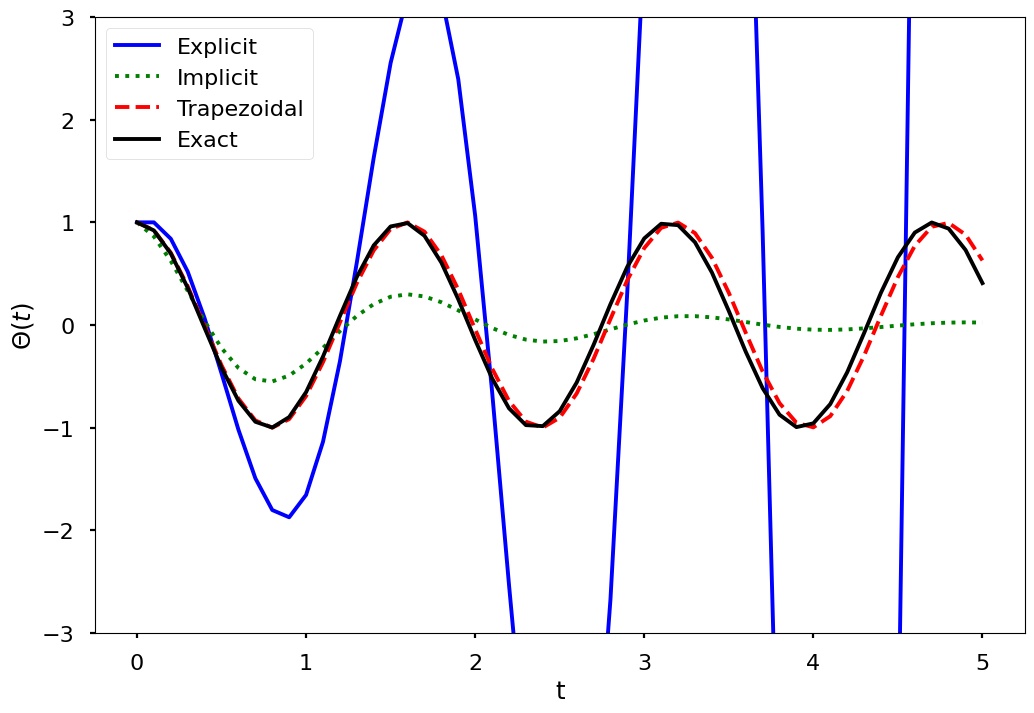

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline
# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

#### Predictor-Corrector Methods

Given any time and state value, the function, 𝐹(𝑡,𝑆(𝑡)), returns the change of state 𝑑𝑆(𝑡)/𝑑𝑡. Predictor-corrector methods of solving initial value problems improve the approximation accuracy of non-predictor-corrector methods by querying the 𝐹 function several times at different locations (predictions), and then using a weighted average of the results (corrections) to update the state. Essentially, it uses two formulas: the predictor and corrector. The predictor is an explicit formula and first estimates the solution at $𝑡_{𝑗+1}$, i.e. we can use Euler method or some other methods to finish this step. After we obtain the solution $𝑆(𝑡_{𝑗+1})$, we can apply the corrector to improve the accuracy. Using the found $𝑆(𝑡_{𝑗+1})$ on the right-hand side of an otherwise implicit formula, the corrector can calculate a new, more accurate solution.

The midpoint method has a predictor step:$𝑆(𝑡_𝑗+ℎ/2)=𝑆(𝑡_𝑗)+(ℎ/2)𝐹(𝑡_𝑗,𝑆(𝑡_𝑗))$,which is the prediction of the solution value halfway between $t_𝑗$ and $𝑡_{𝑗+1}$.

It then computes the corrector step:$𝑆(𝑡_{𝑗+1})=𝑆(𝑡_𝑗)+ℎ𝐹(𝑡_𝑗+ℎ/2,𝑆(𝑡_𝑗+ℎ/2))$ which computes the solution at $𝑆(𝑡_{𝑗+1})$from 𝑆(𝑡_𝑗)
 but using the derivative from $𝑆(𝑡_𝑗+ℎ/2)$.



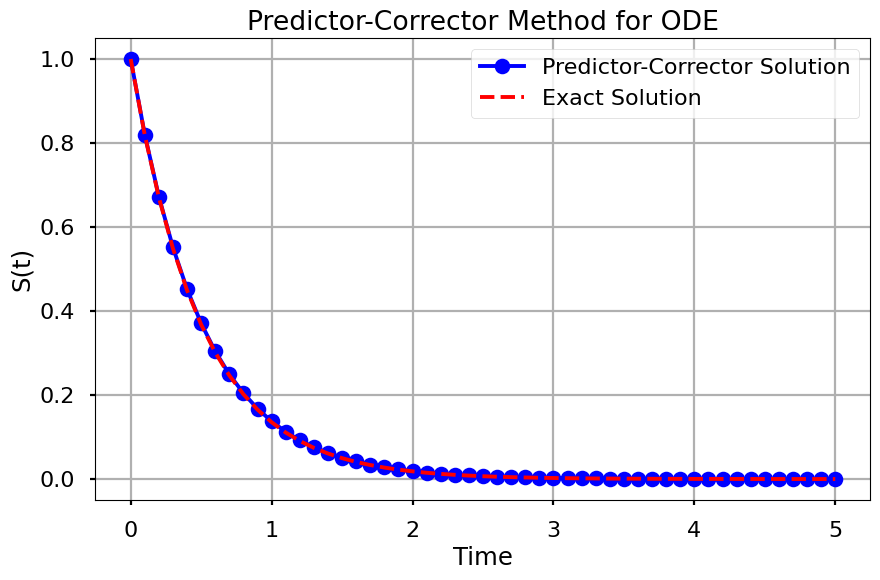

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE
def F(t, S):
    return -2 * S  # Example ODE: dS/dt = -2S

# Parameters
t0, tf = 0, 5  # time range
h = 0.1  # step size
t = np.arange(t0, tf + h, h)  # time grid
S = np.zeros(len(t))  # solution array
S[0] = 1  # initial condition

# Predictor-Corrector Method Implementation
for i in range(len(t) - 1):
    # Predictor (Midpoint method)
    Sp = S[i] + (h/2) * F(t[i], S[i])
    tp = t[i] + h/2
    # Corrector
    S[i + 1] = S[i] + h * F(tp, Sp)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, S, 'bo-', label='Predictor-Corrector Solution')
plt.plot(t, np.exp(-2*t), 'r--', label='Exact Solution')
plt.title('Predictor-Corrector Method for ODE')
plt.xlabel('Time')
plt.ylabel('S(t)')
plt.legend()
plt.grid(True)
plt.show()


Exact Solution: Shown as a black dash-dotted line, represents the analytical solution of the ODE.

Euler Method: Red circles represent the approximate solution obtained using the Euler method.

Heun's Method (Predictor-Corrector): Green crosses show the approximation from Heun's method, which is a simple predictor-corrector method.

Runge-Kutta 4th Order: Blue triangles depict the solution obtained with the Runge-Kutta 4th order method, known for its higher accuracy.


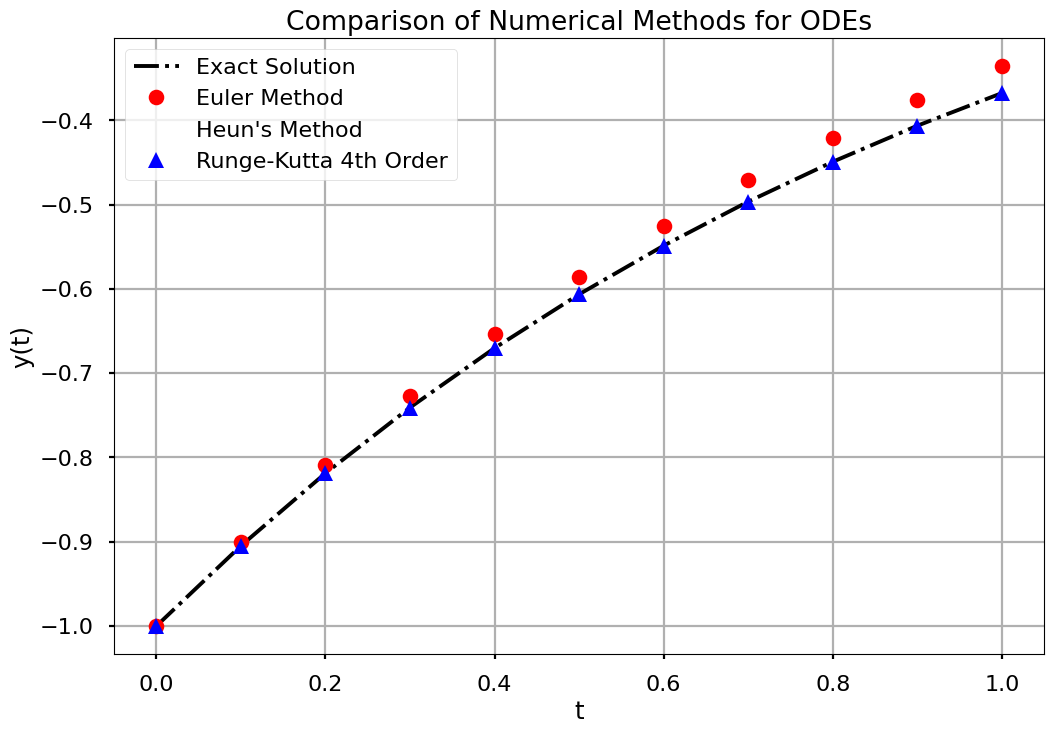

In [ ]:
# Define parameters for the ODE
f_exact = lambda t: -np.exp(-t)  # Exact solution
f_prime = lambda t, y: np.exp(-t)  # Derivative function
h = 0.1  # Step size
t = np.arange(0, 1 + h, h)  # Time interval

# Initialize arrays to store the solutions
y_exact = f_exact(t)
y_euler = np.zeros(len(t))
y_heun = np.zeros(len(t))
y_rk4 = np.zeros(len(t))

# Initial condition
y_euler[0] = y_heun[0] = y_rk4[0] = -1

# Euler method
for i in range(len(t) - 1):
    y_euler[i + 1] = y_euler[i] + h * f_prime(t[i], y_euler[i])

# Heun's method (A simple predictor-corrector method)
for i in range(len(t) - 1):
    y_pred = y_heun[i] + h * f_prime(t[i], y_heun[i])  # Predictor step
    y_heun[i + 1] = y_heun[i] + 0.5 * h * (f_prime(t[i], y_heun[i]) + f_prime(t[i + 1], y_pred))  # Corrector step

# Runge-Kutta 4th order method
for i in range(len(t) - 1):
    k1 = h * f_prime(t[i], y_rk4[i])
    k2 = h * f_prime(t[i] + h/2, y_rk4[i] + k1/2)
    k3 = h * f_prime(t[i] + h/2, y_rk4[i] + k2/2)
    k4 = h * f_prime(t[i] + h, y_rk4[i] + k3)
    y_rk4[i + 1] = y_rk4[i] + (k1 + 2*k2 + 2*k3 + k4) / 6

# Plotting the solutions
plt.figure(figsize=(12, 8))
plt.plot(t, y_exact, label="Exact Solution", color="black", linestyle="dashdot")
plt.plot(t, y_euler, label="Euler Method", marker="o", linestyle="none", color="red")
plt.plot(t, y_heun, label="Heun's Method", marker="x", linestyle="none", color="green")
plt.plot(t, y_rk4, label="Runge-Kutta 4th Order", marker="^", linestyle="none", color="blue")

plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Comparison of Numerical Methods for ODEs")
plt.legend()
plt.grid(True)
plt.show()


#### Python ODE Solvers

<ipython-input-2-f2eb92c877a7>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


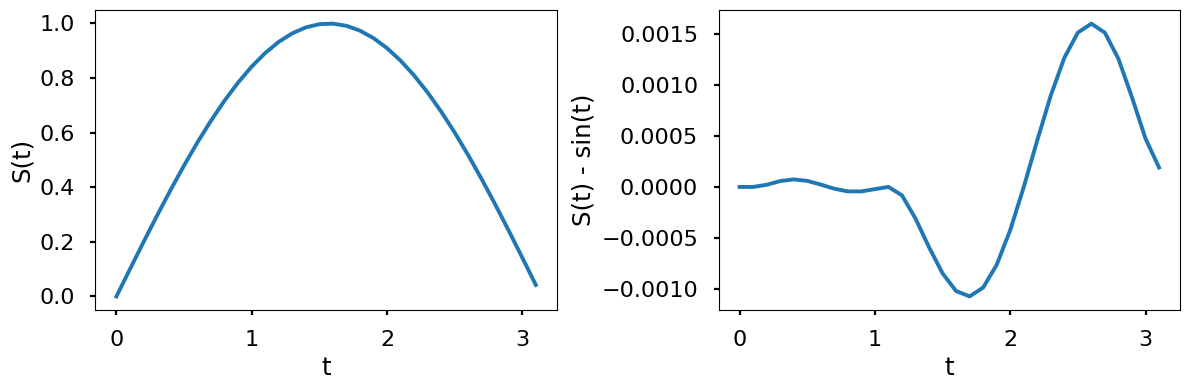

In [ ]:
#𝑑𝑆(𝑡)/𝑑𝑡=cos(𝑡)
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

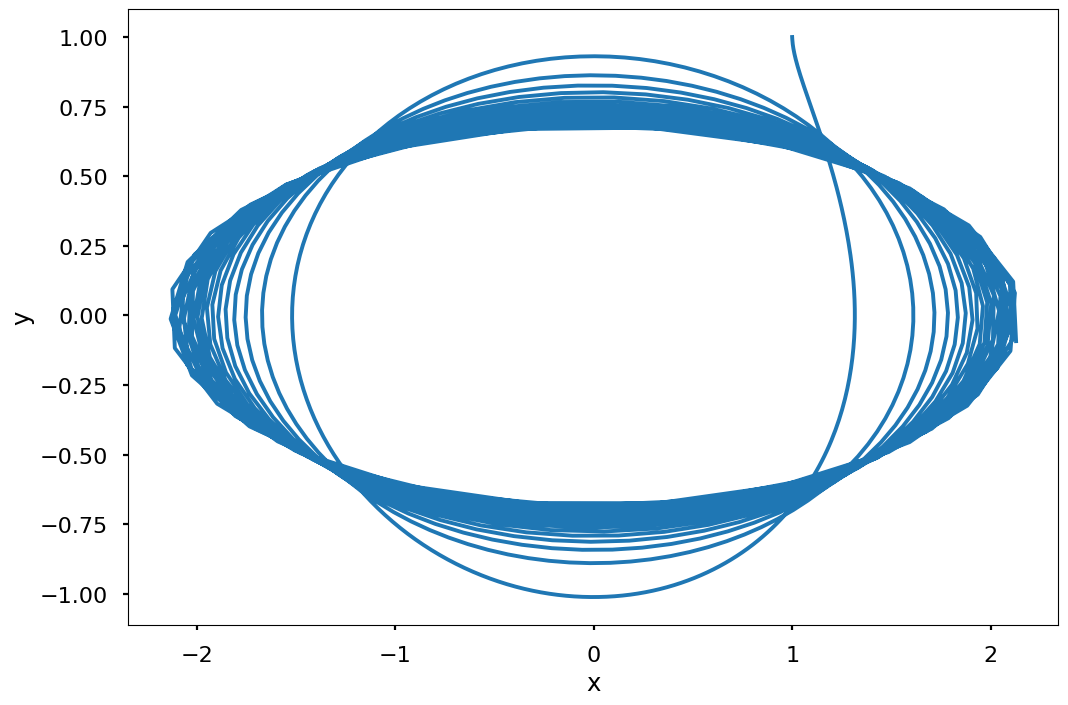

In [ ]:
#𝑑𝑆(𝑡)/𝑑𝑡=[0;−𝑡;𝑡;20]𝑆(𝑡).
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()